In [241]:
from tensorflow import keras
from keras.models import Model
from keras.layers import Input, Conv2D,  BatchNormalization, Add, Activation, MaxPooling2D, concatenate, Flatten, Dense, AveragePooling2D
from keras.optimizers import Adam
from tensorflow import keras
from keras.datasets import mnist
from keras.layers import Conv2D, MaxPooling2D,AveragePooling2D
from keras.layers import Dense, Flatten
from keras.models import Sequential

In [242]:
import os
from PIL import Image
import numpy as np
from sklearn.model_selection import train_test_split

In [243]:
# Path to the main flower dataset folder
dataset_folder = 'flowers'

# List of class names
class_names = ['daisy', 'dandelion', 'rose', 'sunflower', 'tulip']

# Load and preprocess images
data = []
labels = []

for class_idx, class_name in enumerate(class_names):
    class_folder = os.path.join(dataset_folder, class_name)
    for img_file in os.listdir(class_folder):
        img_path = os.path.join(class_folder, img_file)
        img = Image.open(img_path)
        img = img.resize((32, 32))
        img_array = np.array(img)
        data.append(img_array)
        labels.append(class_idx)


In [244]:
# Convert to numpy arrays
data = np.array(data)
labels = np.array(labels)
# Split the dataset into training and testing sets
from sklearn.model_selection import train_test_split

# Split the data into training, validation, and testing sets
x_train, x_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42, stratify=labels)
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=42, stratify=y_train)


In [245]:
# Print the shapes of the datasets
print("x_train shape:", x_train.shape)
print("y_train shape:", y_train.shape)
print("x_val shape", x_val.shape)
print("y_val shape :", y_val.shape)
print("x_test shape:", x_test.shape)
print("y_test shape:", y_test.shape)


x_train shape: (2762, 32, 32, 3)
y_train shape: (2762,)
x_val shape (691, 32, 32, 3)
y_val shape : (691,)
x_test shape: (864, 32, 32, 3)
y_test shape: (864,)


In [246]:
x_train = x_train / 255.0
x_val = x_val / 255.0
x_test = x_test / 255.0

In [247]:
# Convert labels to one-hot encoding
y_train = keras.utils.to_categorical(y_train, 5)
y_val = keras.utils.to_categorical(y_val, 5)
y_test = keras.utils.to_categorical(y_test, 5)

In [248]:
from keras.callbacks import ModelCheckpoint, EarlyStopping,ReduceLROnPlateau
checkpoint = ModelCheckpoint('best_model1_weights.h5', monitor='val_accuracy', save_best_only=True)
early_stopping=EarlyStopping(monitor='val_acc',mode='auto',patience=5,restore_best_weights=True)

In [249]:
from tensorflow.keras import layers, Sequential
from keras import applications 
from tensorflow.keras.optimizers import SGD
from keras.layers  import Input
from tensorflow.keras.layers import AveragePooling2D, Input, Flatten, Dense, Dropout
from keras.models import Model
from tensorflow.keras.optimizers import Adam

In [250]:
#custom Model
customModel = Sequential()
customModel=Sequential(
    [
        layers.Conv2D(512,3,input_shape=(32,32,3),padding='same',activation='relu'),
        layers.BatchNormalization(),
        layers.MaxPooling2D(),
        layers.Conv2D(256,3,padding='same',activation='relu'),
        layers.Conv2D(256,3,padding='same',activation='relu'),
        layers.BatchNormalization(),
        layers.MaxPooling2D(),
        layers.Conv2D(128,3,padding='same',activation='relu'),
        layers.Conv2D(128,3,padding='same',activation='relu'),
        layers.BatchNormalization(),
        layers.MaxPooling2D(),
        layers.Conv2D(64,3,padding='same',activation='relu'),
        layers.Conv2D(64,3,padding='same',activation='relu'),
        layers.BatchNormalization(),        
        layers.MaxPooling2D(),
        layers.Conv2D(32,3,padding='same',activation='relu'),
        layers.Conv2D(32,3,padding='same',activation='relu'),
        layers.BatchNormalization(),        
        layers.MaxPooling2D(),
        layers.Flatten(),

        layers.Dense(512,activation='relu'),
        layers.Dense(256,activation='relu'),
        layers.Dense(128,activation='relu'),
        layers.Dense(5,activation='softmax'),
    ]
)
customModel.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
customModel.summary()

Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_56 (Conv2D)          (None, 32, 32, 512)       14336     
                                                                 
 batch_normalization_30 (Ba  (None, 32, 32, 512)       2048      
 tchNormalization)                                               
                                                                 
 max_pooling2d_30 (MaxPooli  (None, 16, 16, 512)       0         
 ng2D)                                                           
                                                                 
 conv2d_57 (Conv2D)          (None, 16, 16, 256)       1179904   
                                                                 
 conv2d_58 (Conv2D)          (None, 16, 16, 256)       590080    
                                                                 
 batch_normalization_31 (Ba  (None, 16, 16, 256)     

In [251]:
y_train.shape

(2762, 5)

In [252]:
history = customModel.fit(
    x_train,y_train,
    epochs=35,
    validation_data=(x_val, y_val),
    callbacks=[checkpoint,early_stopping])

# history.compile(loss=keras.metrics.categorical_crossentropy, optimizer=keras.optimizers.Adam(), metrics=['accuracy'])
# customModel.fit(x_train, y_train, batch_size=128, epochs=10, verbose=1, validation_data=(x_test, y_test))

Epoch 1/35
87/87 [==============================] - ETA: 0s - loss: 1.3291 - accuracy: 0.4236WARNING:tensorflow:Early stopping conditioned on metric `val_acc` which is not available. Available metrics are: loss,accuracy,val_loss,val_accuracy


c:\Users\VAIBHAV\Downloads\Flower Classification\env\Lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


87/87 [==============================] - 75s 824ms/step - loss: 1.3291 - accuracy: 0.4236 - val_loss: 1.5792 - val_accuracy: 0.2504
Epoch 2/35
87/87 [==============================] - ETA: 0s - loss: 1.1194 - accuracy: 0.5427WARNING:tensorflow:Early stopping conditioned on metric `val_acc` which is not available. Available metrics are: loss,accuracy,val_loss,val_accuracy


87/87 [==============================] - 71s 821ms/step - loss: 1.1194 - accuracy: 0.5427 - val_loss: 2.0077 - val_accuracy: 0.2446
Epoch 3/35
87/87 [==============================] - ETA: 0s - loss: 1.0474 - accuracy: 0.5825WARNING:tensorflow:Early stopping conditioned on metric `val_acc` which is not available. Available metrics are: loss,accuracy,val_loss,val_accuracy


87/87 [==============================] - 71s 821ms/step - loss: 1.0474 - accuracy: 0.5825 - val_loss: 2.0774 - val_accuracy: 0.2822
Epoch 4/35
87/87 [==============================] - ETA: 0s - loss: 0.9778 - accuracy: 0.6133WARNING:tensorflow:Early stopping conditioned on metric `val_acc` which is not available. Available metrics are: loss,accuracy,val_loss,val_accuracy


87/87 [==============================] - 71s 822ms/step - loss: 0.9778 - accuracy: 0.6133 - val_loss: 1.5359 - val_accuracy: 0.3415
Epoch 5/35
87/87 [==============================] - ETA: 0s - loss: 0.9225 - accuracy: 0.6376WARNING:tensorflow:Early stopping conditioned on metric `val_acc` which is not available. Available metrics are: loss,accuracy,val_loss,val_accuracy


87/87 [==============================] - 72s 824ms/step - loss: 0.9225 - accuracy: 0.6376 - val_loss: 1.7333 - val_accuracy: 0.3705
Epoch 6/35
87/87 [==============================] - ETA: 0s - loss: 0.8800 - accuracy: 0.6568WARNING:tensorflow:Early stopping conditioned on metric `val_acc` which is not available. Available metrics are: loss,accuracy,val_loss,val_accuracy


87/87 [==============================] - 71s 813ms/step - loss: 0.8800 - accuracy: 0.6568 - val_loss: 1.1485 - val_accuracy: 0.5427
Epoch 7/35
87/87 [==============================] - ETA: 0s - loss: 0.8300 - accuracy: 0.6720WARNING:tensorflow:Early stopping conditioned on metric `val_acc` which is not available. Available metrics are: loss,accuracy,val_loss,val_accuracy


87/87 [==============================] - 70s 805ms/step - loss: 0.8300 - accuracy: 0.6720 - val_loss: 1.3312 - val_accuracy: 0.5137
Epoch 8/35
87/87 [==============================] - ETA: 0s - loss: 0.7856 - accuracy: 0.6995WARNING:tensorflow:Early stopping conditioned on metric `val_acc` which is not available. Available metrics are: loss,accuracy,val_loss,val_accuracy


87/87 [==============================] - 70s 804ms/step - loss: 0.7856 - accuracy: 0.6995 - val_loss: 1.2677 - val_accuracy: 0.5441
Epoch 9/35
87/87 [==============================] - ETA: 0s - loss: 0.7505 - accuracy: 0.7209WARNING:tensorflow:Early stopping conditioned on metric `val_acc` which is not available. Available metrics are: loss,accuracy,val_loss,val_accuracy


87/87 [==============================] - 70s 808ms/step - loss: 0.7505 - accuracy: 0.7209 - val_loss: 1.1016 - val_accuracy: 0.5760
Epoch 10/35
87/87 [==============================] - ETA: 0s - loss: 0.7230 - accuracy: 0.7263WARNING:tensorflow:Early stopping conditioned on metric `val_acc` which is not available. Available metrics are: loss,accuracy,val_loss,val_accuracy


87/87 [==============================] - 70s 805ms/step - loss: 0.7230 - accuracy: 0.7263 - val_loss: 1.2283 - val_accuracy: 0.5630
Epoch 11/35
87/87 [==============================] - ETA: 0s - loss: 0.6938 - accuracy: 0.7350WARNING:tensorflow:Early stopping conditioned on metric `val_acc` which is not available. Available metrics are: loss,accuracy,val_loss,val_accuracy


87/87 [==============================] - 71s 814ms/step - loss: 0.6938 - accuracy: 0.7350 - val_loss: 2.3828 - val_accuracy: 0.4298
Epoch 12/35
87/87 [==============================] - ETA: 0s - loss: 0.6576 - accuracy: 0.7647WARNING:tensorflow:Early stopping conditioned on metric `val_acc` which is not available. Available metrics are: loss,accuracy,val_loss,val_accuracy


87/87 [==============================] - 71s 815ms/step - loss: 0.6576 - accuracy: 0.7647 - val_loss: 1.1688 - val_accuracy: 0.5716
Epoch 13/35
87/87 [==============================] - ETA: 0s - loss: 0.5913 - accuracy: 0.7820WARNING:tensorflow:Early stopping conditioned on metric `val_acc` which is not available. Available metrics are: loss,accuracy,val_loss,val_accuracy


87/87 [==============================] - 70s 808ms/step - loss: 0.5913 - accuracy: 0.7820 - val_loss: 1.1434 - val_accuracy: 0.5847
Epoch 14/35
87/87 [==============================] - ETA: 0s - loss: 0.5352 - accuracy: 0.8023WARNING:tensorflow:Early stopping conditioned on metric `val_acc` which is not available. Available metrics are: loss,accuracy,val_loss,val_accuracy


87/87 [==============================] - 71s 814ms/step - loss: 0.5352 - accuracy: 0.8023 - val_loss: 1.2248 - val_accuracy: 0.6151
Epoch 15/35
87/87 [==============================] - ETA: 0s - loss: 0.5285 - accuracy: 0.8106WARNING:tensorflow:Early stopping conditioned on metric `val_acc` which is not available. Available metrics are: loss,accuracy,val_loss,val_accuracy


87/87 [==============================] - 71s 819ms/step - loss: 0.5285 - accuracy: 0.8106 - val_loss: 1.7870 - val_accuracy: 0.5745
Epoch 16/35
87/87 [==============================] - ETA: 0s - loss: 0.4623 - accuracy: 0.8331WARNING:tensorflow:Early stopping conditioned on metric `val_acc` which is not available. Available metrics are: loss,accuracy,val_loss,val_accuracy


87/87 [==============================] - 69s 792ms/step - loss: 0.4623 - accuracy: 0.8331 - val_loss: 1.0293 - val_accuracy: 0.6498
Epoch 17/35
87/87 [==============================] - ETA: 0s - loss: 0.4702 - accuracy: 0.8371WARNING:tensorflow:Early stopping conditioned on metric `val_acc` which is not available. Available metrics are: loss,accuracy,val_loss,val_accuracy


87/87 [==============================] - 93s 1s/step - loss: 0.4702 - accuracy: 0.8371 - val_loss: 1.1420 - val_accuracy: 0.6049
Epoch 18/35
87/87 [==============================] - ETA: 0s - loss: 0.3681 - accuracy: 0.8707WARNING:tensorflow:Early stopping conditioned on metric `val_acc` which is not available. Available metrics are: loss,accuracy,val_loss,val_accuracy


87/87 [==============================] - 99s 1s/step - loss: 0.3681 - accuracy: 0.8707 - val_loss: 1.2776 - val_accuracy: 0.6483
Epoch 19/35
87/87 [==============================] - ETA: 0s - loss: 0.3527 - accuracy: 0.8758WARNING:tensorflow:Early stopping conditioned on metric `val_acc` which is not available. Available metrics are: loss,accuracy,val_loss,val_accuracy


87/87 [==============================] - 97s 1s/step - loss: 0.3527 - accuracy: 0.8758 - val_loss: 1.7347 - val_accuracy: 0.5904
Epoch 20/35
87/87 [==============================] - ETA: 0s - loss: 0.2984 - accuracy: 0.8983WARNING:tensorflow:Early stopping conditioned on metric `val_acc` which is not available. Available metrics are: loss,accuracy,val_loss,val_accuracy


87/87 [==============================] - 96s 1s/step - loss: 0.2984 - accuracy: 0.8983 - val_loss: 1.2027 - val_accuracy: 0.6223
Epoch 21/35
87/87 [==============================] - ETA: 0s - loss: 0.2745 - accuracy: 0.9037WARNING:tensorflow:Early stopping conditioned on metric `val_acc` which is not available. Available metrics are: loss,accuracy,val_loss,val_accuracy


87/87 [==============================] - 98s 1s/step - loss: 0.2745 - accuracy: 0.9037 - val_loss: 1.3286 - val_accuracy: 0.6397
Epoch 22/35
87/87 [==============================] - ETA: 0s - loss: 0.2465 - accuracy: 0.9203WARNING:tensorflow:Early stopping conditioned on metric `val_acc` which is not available. Available metrics are: loss,accuracy,val_loss,val_accuracy


87/87 [==============================] - 93s 1s/step - loss: 0.2465 - accuracy: 0.9203 - val_loss: 1.1916 - val_accuracy: 0.6628
Epoch 23/35
87/87 [==============================] - ETA: 0s - loss: 0.1507 - accuracy: 0.9508WARNING:tensorflow:Early stopping conditioned on metric `val_acc` which is not available. Available metrics are: loss,accuracy,val_loss,val_accuracy


87/87 [==============================] - 90s 1s/step - loss: 0.1507 - accuracy: 0.9508 - val_loss: 1.5401 - val_accuracy: 0.6425
Epoch 24/35
87/87 [==============================] - ETA: 0s - loss: 0.1416 - accuracy: 0.9518WARNING:tensorflow:Early stopping conditioned on metric `val_acc` which is not available. Available metrics are: loss,accuracy,val_loss,val_accuracy


87/87 [==============================] - 94s 1s/step - loss: 0.1416 - accuracy: 0.9518 - val_loss: 1.3398 - val_accuracy: 0.6874
Epoch 25/35
87/87 [==============================] - ETA: 0s - loss: 0.1805 - accuracy: 0.9442WARNING:tensorflow:Early stopping conditioned on metric `val_acc` which is not available. Available metrics are: loss,accuracy,val_loss,val_accuracy


87/87 [==============================] - 93s 1s/step - loss: 0.1805 - accuracy: 0.9442 - val_loss: 1.6010 - val_accuracy: 0.5991
Epoch 26/35
87/87 [==============================] - ETA: 0s - loss: 0.1676 - accuracy: 0.9435WARNING:tensorflow:Early stopping conditioned on metric `val_acc` which is not available. Available metrics are: loss,accuracy,val_loss,val_accuracy


87/87 [==============================] - 95s 1s/step - loss: 0.1676 - accuracy: 0.9435 - val_loss: 1.3395 - val_accuracy: 0.6498
Epoch 27/35
87/87 [==============================] - ETA: 0s - loss: 0.1147 - accuracy: 0.9631WARNING:tensorflow:Early stopping conditioned on metric `val_acc` which is not available. Available metrics are: loss,accuracy,val_loss,val_accuracy


87/87 [==============================] - 87s 1s/step - loss: 0.1147 - accuracy: 0.9631 - val_loss: 1.7702 - val_accuracy: 0.5890
Epoch 28/35
87/87 [==============================] - ETA: 0s - loss: 0.1788 - accuracy: 0.9377WARNING:tensorflow:Early stopping conditioned on metric `val_acc` which is not available. Available metrics are: loss,accuracy,val_loss,val_accuracy


87/87 [==============================] - 105s 1s/step - loss: 0.1788 - accuracy: 0.9377 - val_loss: 1.9636 - val_accuracy: 0.5673
Epoch 29/35
87/87 [==============================] - ETA: 0s - loss: 0.1175 - accuracy: 0.9663WARNING:tensorflow:Early stopping conditioned on metric `val_acc` which is not available. Available metrics are: loss,accuracy,val_loss,val_accuracy


87/87 [==============================] - 105s 1s/step - loss: 0.1175 - accuracy: 0.9663 - val_loss: 1.4890 - val_accuracy: 0.6541
Epoch 30/35
87/87 [==============================] - ETA: 0s - loss: 0.1163 - accuracy: 0.9594WARNING:tensorflow:Early stopping conditioned on metric `val_acc` which is not available. Available metrics are: loss,accuracy,val_loss,val_accuracy


87/87 [==============================] - 110s 1s/step - loss: 0.1163 - accuracy: 0.9594 - val_loss: 1.3900 - val_accuracy: 0.6498
Epoch 31/35
87/87 [==============================] - ETA: 0s - loss: 0.0922 - accuracy: 0.9710WARNING:tensorflow:Early stopping conditioned on metric `val_acc` which is not available. Available metrics are: loss,accuracy,val_loss,val_accuracy


87/87 [==============================] - 106s 1s/step - loss: 0.0922 - accuracy: 0.9710 - val_loss: 1.8230 - val_accuracy: 0.6512
Epoch 32/35
87/87 [==============================] - ETA: 0s - loss: 0.1079 - accuracy: 0.9642WARNING:tensorflow:Early stopping conditioned on metric `val_acc` which is not available. Available metrics are: loss,accuracy,val_loss,val_accuracy


87/87 [==============================] - 105s 1s/step - loss: 0.1079 - accuracy: 0.9642 - val_loss: 1.4108 - val_accuracy: 0.6787
Epoch 33/35
87/87 [==============================] - ETA: 0s - loss: 0.0784 - accuracy: 0.9750WARNING:tensorflow:Early stopping conditioned on metric `val_acc` which is not available. Available metrics are: loss,accuracy,val_loss,val_accuracy


87/87 [==============================] - 102s 1s/step - loss: 0.0784 - accuracy: 0.9750 - val_loss: 1.7243 - val_accuracy: 0.6397
Epoch 34/35
87/87 [==============================] - ETA: 0s - loss: 0.0597 - accuracy: 0.9833WARNING:tensorflow:Early stopping conditioned on metric `val_acc` which is not available. Available metrics are: loss,accuracy,val_loss,val_accuracy


87/87 [==============================] - 104s 1s/step - loss: 0.0597 - accuracy: 0.9833 - val_loss: 1.8537 - val_accuracy: 0.6295
Epoch 35/35
87/87 [==============================] - ETA: 0s - loss: 0.0832 - accuracy: 0.9750WARNING:tensorflow:Early stopping conditioned on metric `val_acc` which is not available. Available metrics are: loss,accuracy,val_loss,val_accuracy


87/87 [==============================] - 93s 1s/step - loss: 0.0832 - accuracy: 0.9750 - val_loss: 1.8753 - val_accuracy: 0.6512


In [253]:
val_loss, val_acc = customModel.evaluate(x_val,y_val)
print('Validation accuracy : ', val_acc)

22/22 [==============================] - 7s 307ms/step - loss: 1.8753 - accuracy: 0.6512
Validation accuracy :  0.6512300968170166


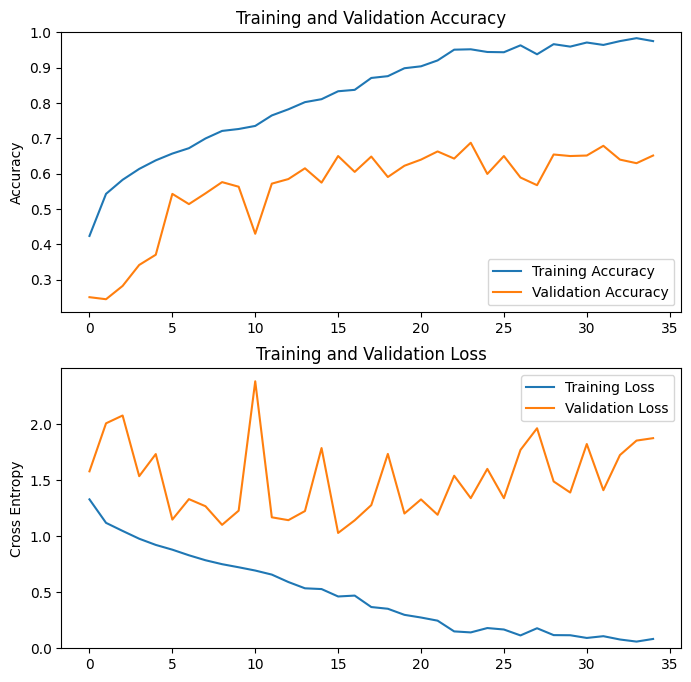

In [254]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']


plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy')
plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
plt.ylim([0,max(plt.ylim())])
plt.title('Training and Validation Loss')
plt.show()

In [255]:
import pandas as pd
import seaborn as sns

22/22 [==============================] - 7s 247ms/step


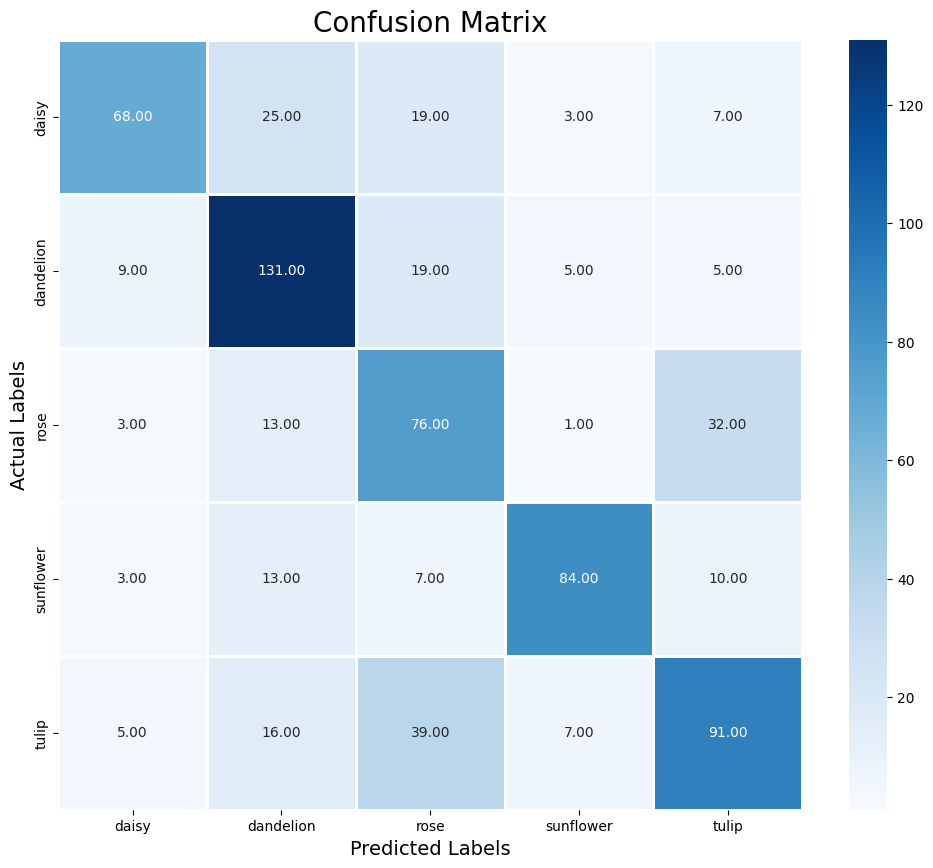

              precision    recall  f1-score   support

           0       0.77      0.56      0.65       122
           1       0.66      0.78      0.71       169
           2       0.47      0.61      0.53       125
           3       0.84      0.72      0.77       117
           4       0.63      0.58      0.60       158

    accuracy                           0.65       691
   macro avg       0.68      0.65      0.65       691
weighted avg       0.67      0.65      0.65       691



In [256]:
from sklearn.metrics import confusion_matrix,classification_report
valid_pres=customModel.predict(x_val)
valid_pred = [np.argmax(pred) for pred in valid_pres]
y_val = np.argmax(y_val, axis=1)
cm =confusion_matrix(y_val,valid_pred)
plt.figure(figsize = (12, 10))
cm = pd.DataFrame(cm , index = [i for i in class_names] , columns = [i for i in class_names])
#cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
sns.heatmap(cm, linecolor='white', cmap='Blues', linewidth=1, annot=True, fmt='.2f')
plt.title('Confusion Matrix', size=20)
plt.xlabel('Predicted Labels', size=14)
plt.ylabel('Actual Labels', size=14)
plt.show()
print(classification_report(y_val,valid_pred))

In [257]:
score = customModel.evaluate(x_test, y_test)

27/27 [==============================] - 7s 228ms/step - loss: 1.7950 - accuracy: 0.6516


In [258]:
print('Test Loss:', score[0])
print('Test accuracy:', score[1])

Test Loss: 1.7949953079223633
Test accuracy: 0.6516203880310059


#### Save Model

In [259]:
customModel.save('Saved_Model')

INFO:tensorflow:Assets written to: Saved_Model\assets


INFO:tensorflow:Assets written to: Saved_Model\assets


#### Load Model

In [263]:
import tensorflow as tf
import numpy as np
from PIL import Image
import tensorflow as tf
model = tf.keras.models.load_model('Saved_Model')


#### Predict Image

In [264]:
def preprocess_image(image_path):
    img = Image.open(image_path)
    img = img.resize((32, 32))
    
    # Convert to RGB in case the image has an alpha channel
    img = img.convert('RGB')
    
    img_array = np.array(img)
    img_array = img_array.astype('float32') / 255.0
    img_array = np.expand_dims(img_array, axis=0)
    return img_array


In [265]:
# Class names 
class_names = ['daisy', 'dandelion', 'rose', 'sunflower', 'tulip']

In [270]:
# Predict the class
image_path = 'flowers/rose/12240303_80d87f77a3_n.jpg'
input_image = preprocess_image(image_path)
predictions = model.predict(input_image)

predicted_class = np.argmax(predictions)
predicted_class_name = class_names[predicted_class]

print("Predicted class:", predicted_class_name)

1/1 [==============================] - 1s 522ms/step
Predicted class: rose
